In [57]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [58]:
# Load .env enviroment variables
load_dotenv()


True

In [59]:
# Set current amount of crypto assets
average_income = 12000
my_btc = 1.2
my_eth = 5.3


In [60]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [61]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_data = requests.get(eth_url).json()

# Compute current value of my crpto
btc_price = btc_data['data']['1']['quotes']['USD']['price']
my_btc_value = my_btc * btc_price

eth_price = eth_data['data']['1027']['quotes']['USD']['price']
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $53976.00
The current value of your 5.3 ETH is $17239.15


In [62]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [63]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)


In [64]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
my_stocks_bonds = api.get_barset(
    tickers,
    timeframe,
    start=today
).df

# Preview DataFrame
my_stocks_bonds.head()


AGG                                        SPY  \
                             open    high       low   close   volume    open   
time                                                                           
2021-09-10 00:00:00-04:00  115.99  116.01  115.7801  115.87  2767552  451.04   

                                                            
                             high     low  close    volume  
time                                                        
2021-09-10 00:00:00-04:00  451.49  445.31  445.5  75763259

In [65]:
# Pick AGG and SPY close prices
agg_close_price = float(my_stocks_bonds['AGG']['close'])
spy_close_price = float(my_stocks_bonds['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $115.87
Current SPY closing price: $445.5


In [66]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22275.00
The current value of your 200 AGG shares is $23174.00


In [67]:
# Set monthly household income
my_monthly_income = 12000

# Consolidate financial assets data
my_crypto_assets = my_btc_value + my_eth_value
my_shares_assets = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [my_crypto_assets, my_shares_assets]}, index=['crypto','shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,71215.151
shares,45449.000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

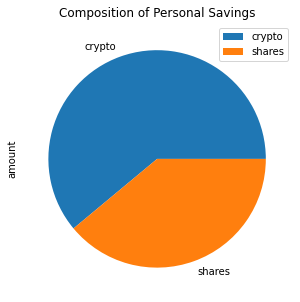

In [68]:
# Plot savings pie chart
df_savings.plot.pie(title='Composition of Personal Savings', y='amount', figsize=(5,5))


In [69]:
# Set ideal emergency fund
my_emergency_fund = my_monthly_income * 3

# Calculate total amount of savings
my_total_savings = my_crypto_assets + my_shares_assets

# Validate saving health
if my_total_savings > my_emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif my_total_savings == my_emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${my_emergency_fund - my_total_savings} away from reaching your financial goal.")
    

Congratulations! You have enough money in your emergency fund.
